In [52]:
import requests
url = "http://35.228.68.102.nip.io/galaxies/query"
from dhlab.nbtext import make_graph
import networkx as nx

In [25]:
import dhlab.graph_networkx_louvain as gnl

In [22]:
def word_graph(word = None, cutoff = 20, corpus = 'all'):
    """ corpus = bok, avis or all"""
    params = {
        'terms':word, 
        'leaves':0,
        'limit':cutoff,
        'corpus':corpus,
    }
    r = requests.get(url, params = params)
    G = nx.DiGraph()
    edgelist = []
    if r.status_code == 200:
        #graph = json.loads(result.text)
        graph = r.json()
        #print(graph)
        nodes = graph['nodes']
        edges = graph['links']
        for edge in edges:
            edgelist += [(nodes[edge['source']]['name'], nodes[edge['target']]['name'], abs(edge['value']))]
        G.add_weighted_edges_from(edgelist)
    return G

In [54]:
G = word_graph(word = 'skjønnhet, vold')

In [64]:
M = make_graph('beauty, violence', lang = 'eng')

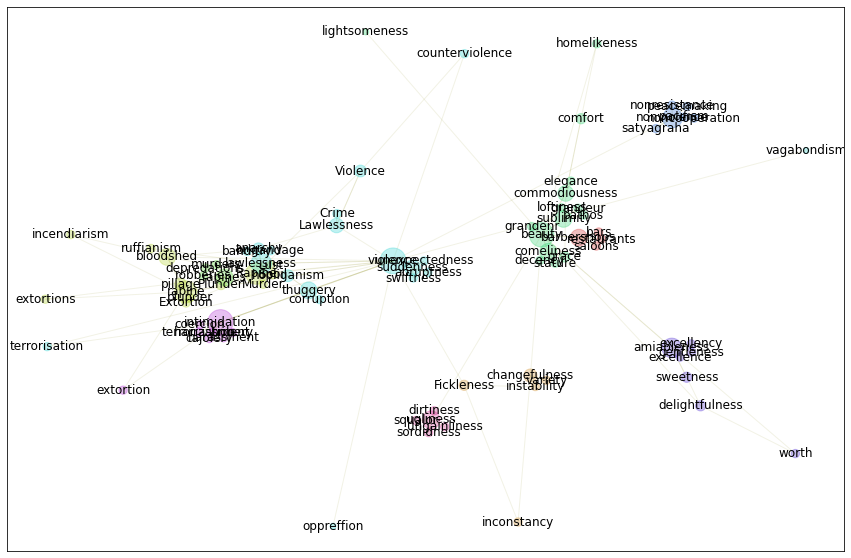

In [68]:
gnl.show_graph(M, fontsize = 12)

In [89]:
def path(graph = None, source = None, target = None):
    if nx.is_directed(graph):
        k = 'directed'
    else:
        k = 'undirected'
    try:
        res = (source, target, k, nx.shortest_path(graph, source = source, target = target))
    except:
        try:
            res = (source, target, 'undirected', nx.shortest_path(graph.to_undirected(), source = source, target = target))
        except:
            res = (source, target, 'nopath', [])
    return res

In [90]:
path(G, source = 'vold', target = 'skjønnhet')

('vold', 'skjønnhet', 'directed', ['vold', 'makt', 'storhet', 'skjønnhet'])

In [91]:
path(G, source = 'skjønnhet', target = 'vold')

('skjønnhet',
 'vold',
 'directed',
 ['skjønnhet', 'heslighet', 'grusomhet', 'brutalitet', 'vold'])

In [92]:
path(M.to_undirected(), source = 'beauty', target = 'violence')

('beauty',
 'violence',
 'undirected',
 ['beauty', 'changefulness', 'inconstancy', 'Fickleness', 'violence'])

In [93]:
path(M, source = 'violence', target = 'beauty')

('violence',
 'beauty',
 'undirected',
 ['violence', 'Fickleness', 'inconstancy', 'changefulness', 'beauty'])